In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, LinearSVC
from mlxtend.plotting import plot_decision_regions

In [2]:
fires = pd.read_csv('forest_fires.csv')
fires.columns

Index(['Day', 'Month', 'Year', 'Temp', 'Humidity', 'WindSpeed', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Fire'],
      dtype='object')

Text(0, 0.5, 'Duff moisture code')

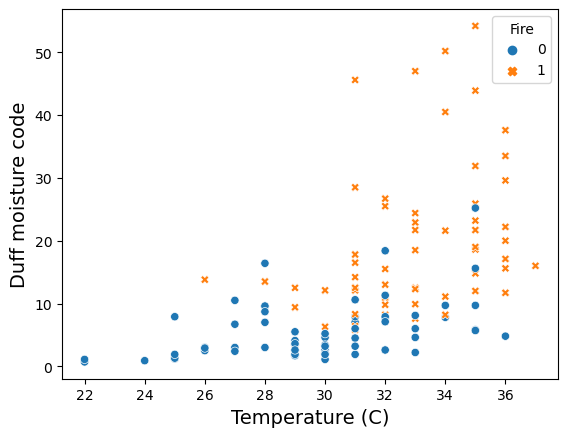

In [3]:
# Scatter plot of temperature vs. duff moisture code (measure of long-term dryness)
p = sns.scatterplot(data=fires, x='Temp', y='DMC', hue='Fire', style='Fire')
p.set_xlabel('Temperature (C)', fontsize=14)
p.set_ylabel('Duff moisture code', fontsize=14)

# Linear kernel

In [4]:
# Input features: temperature and duff moisture content
X = fires[['Temp', 'DMC']]

# Output feature: Fire
# Fire is stored as 0 and 1, which will automatically be converted by SVC()
y = fires[['Fire']]

# Create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

# Scale the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize a support vector classifier with C=0.1
SVCLinear = LinearSVC(C=1.0, max_iter=10000)
SVCLinear.fit(X_train, np.ravel(y_train))

# Print the model weights
# w0
print('w0:', SVCLinear.intercept_)
# w1 and w2
print('w1 and w2:', SVCLinear.coef_)

w0: [0.23236705]
w1 and w2: [[0.00462218 1.18000102]]


In [5]:
SVC_linear = SVC(kernel='linear', C = 1)
SVC_linear.fit(X_train, np.ravel(y_train))
# Print the model weights
# w0
print('w0:', SVC_linear.intercept_)
# w1 and w2
print('w1 and w2:', SVC_linear.coef_)
# Because C is implemented differently in SVC than LinearSVC the resulting
# hyperplane has different weights.

w0: [0.59471902]
w1 and w2: [[-0.04507505  2.32492188]]


In [6]:
# Evaluate LinearSVC model on testing data
SVCLinear.score(X_test, np.ravel(y_test))

0.8648648648648649

In [7]:
# Evaluate SVC 'poly' model on testing data
SVC_linear.score(X_test, np.ravel(y_test))

0.8108108108108109

# Predefined kernels

In [8]:
# Unused parameters are disgarded.
SVC_kernel = SVC(kernel='poly', C = 1, degree = 3, gamma = 0.5) 
SVC_kernel.fit(X_train, np.ravel(y_train))

SVC(C=1, gamma=0.5, kernel='poly')

Text(0.5, 1.0, 'SVC(kernel=my_kernel)')

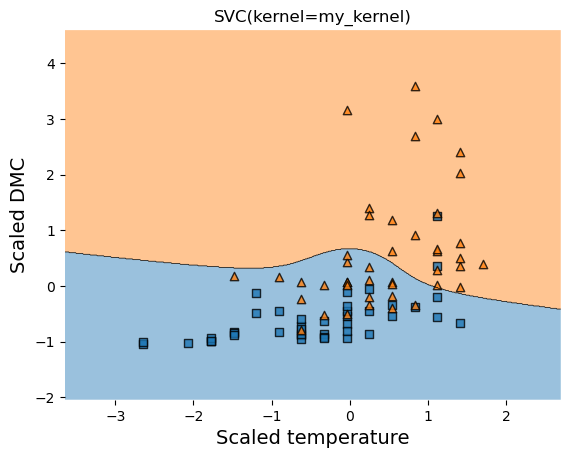

In [9]:
# Display the decision boundary
plot_decision_regions(X_train, np.ravel(y_train), SVC_kernel, legend=0)
plt.xlabel('Scaled temperature', fontsize=14)
plt.ylabel('Scaled DMC', fontsize=14)
plt.title('''SVC(kernel=my_kernel)''')

In [10]:
# Display information about the support vectors
# Indices
SVC_kernel.support_

array([ 1,  3,  4,  5,  7,  8, 11, 12, 13, 15, 21, 24, 25, 32, 33, 35, 39,
       44, 48, 55, 61, 64, 66, 70, 74, 79, 80, 81,  6,  9, 10, 17, 18, 19,
       22, 26, 27, 29, 36, 37, 40, 41, 42, 45, 46, 49, 50, 58, 60, 67, 68,
       69, 72, 73, 83, 84], dtype=int32)

In [11]:
# Support vector values
SVC_kernel.support_vectors_

array([[-0.03751318, -0.54602356],
       [ 0.25236138, -0.44298985],
       [-0.03751318, -0.11515532],
       [-0.03751318, -0.45235655],
       [-0.90713686, -0.45235655],
       [-0.32738774, -0.86449139],
       [-0.03751318, -0.36805624],
       [-0.32738774, -0.62095717],
       [ 1.12198506, -0.56475696],
       [ 1.12198506,  0.35317972],
       [-0.32738774, -0.91132489],
       [ 0.8321105 , -0.37742295],
       [-0.6172623 , -0.72399088],
       [-0.6172623 , -0.87385809],
       [ 1.12198506,  1.252383  ],
       [-0.03751318, -0.68652407],
       [-0.6172623 , -0.86449139],
       [ 0.54223594, -0.34932284],
       [-1.19701142, -0.12452202],
       [ 0.54223594, -0.54602356],
       [ 0.25236138, -0.04958842],
       [ 1.12198506, -0.19945563],
       [-0.6172623 , -0.59285706],
       [ 0.25236138, -0.86449139],
       [-0.6172623 , -0.77082438],
       [-0.03751318, -0.93005829],
       [-0.32738774, -0.93005829],
       [-0.03751318, -0.80829118],
       [-1.48688598,

In [12]:
# alphas - signed with the class of the support vector
SVC_kernel.dual_coef_

array([[-1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -0.02427545, -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        ,  1.        ,  1.        ,
         0.55795625,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         0.46631921,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ]])

# User-defined kernel

Text(0.5, 0.92, 'Transformed data: ')

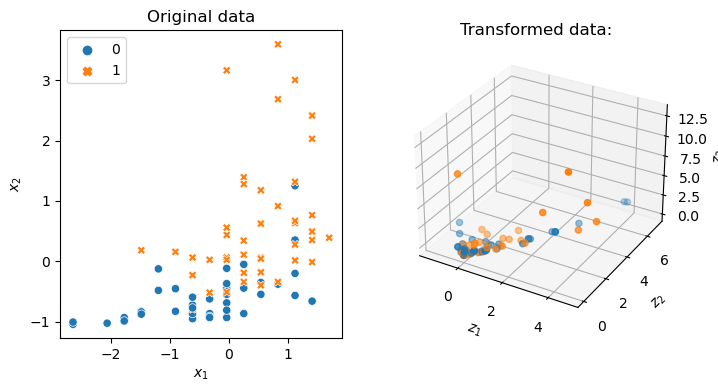

In [13]:
# Define a mapping
def feature_map_3(X):  
    return np.asarray(( np.sqrt(2) *X[:,0] * X[:,1], X[:,0]**2, X[:,1]**2)).T

# Map the data
Z = feature_map_3(X_train)

#2D scatter plot
fig = plt.figure(figsize = (8,4))
ax = fig.add_subplot(1, 2, 1)
sns.scatterplot(x=X_train[:,0], y=X_train[:,1], hue=np.ravel(y_train), 
                style=np.ravel(y_train), ax=ax )
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Original data')

#3D scatter plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
ax.scatter3D(Z[:,0],Z[:,1], Z[:,2],c = np.ravel(y_train), 
             cmap = ListedColormap(sns.color_palette(n_colors=2)) )
ax.set_xlabel('$z_1$')
ax.set_ylabel('$z_2$')
ax.set_zlabel('$z_3$')
ax.set_title('Transformed data: ')

In [14]:
# Define kernel
def my_kernel(X,Y):
    return np.dot(feature_map_3(X),feature_map_3(Y).T )

# Define model and fit
SVC_defined = SVC(kernel=my_kernel, C = 1, gamma = 1)
SVC_defined.fit(X_train, np.ravel(y_train))

SVC(C=1, gamma=1, kernel=<function my_kernel at 0x7f60562ba680>)

Text(0.5, 1.0, 'SVC(kernel=my_kernel)')

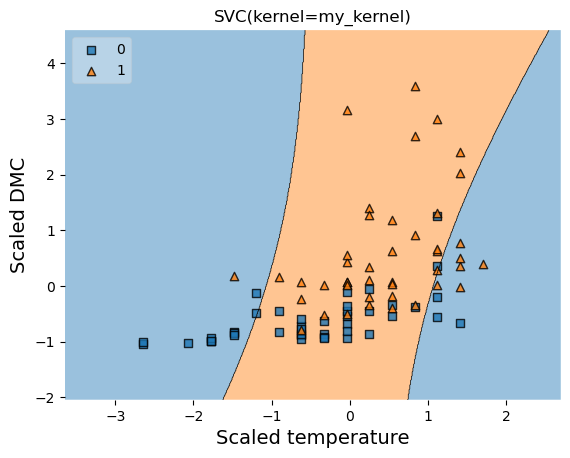

In [15]:
# Display the decision boundary
plot_decision_regions(X_train, np.ravel(y_train), SVC_defined, legend=2)
plt.xlabel('Scaled temperature', fontsize=14)
plt.ylabel('Scaled DMC', fontsize=14)
plt.title('''SVC(kernel=my_kernel)''')

In [16]:
# Evaluate SVC 'my_kernel' model on testing data
SVC_defined.score(X_test, np.ravel(y_test))

0.4864864864864865